In [66]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection

In [4]:
#Load the dataset
df = pd.read_excel('Processed_Flipdata.xlsx')

In [5]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.6+ KB


In [8]:
# To get the values of the memory of the mobile phones 
df['Processor_'].value_counts()

Processor_
Qualcomm Snapdragon 680        33
Unisoc T612                    21
Mediatek Helio A22             19
Mediatek Dimensity 1080        18
Qualcomm Snapdragon 695 5G     17
                               ..
Qualcomm Snapdragon 439         1
Snapdragon 680                  1
snapdragon 888                  1
Qualcomm Snapdragon 855         1
Qualcomm Snapdragon 8 Gen 2     1
Name: count, Length: 123, dtype: int64

In [9]:
list(df['Processor_'].value_counts().keys()[0:5])

['Qualcomm Snapdragon 680',
 'Unisoc T612',
 'Mediatek Helio A22',
 'Mediatek Dimensity 1080',
 'Qualcomm Snapdragon 695 5G']

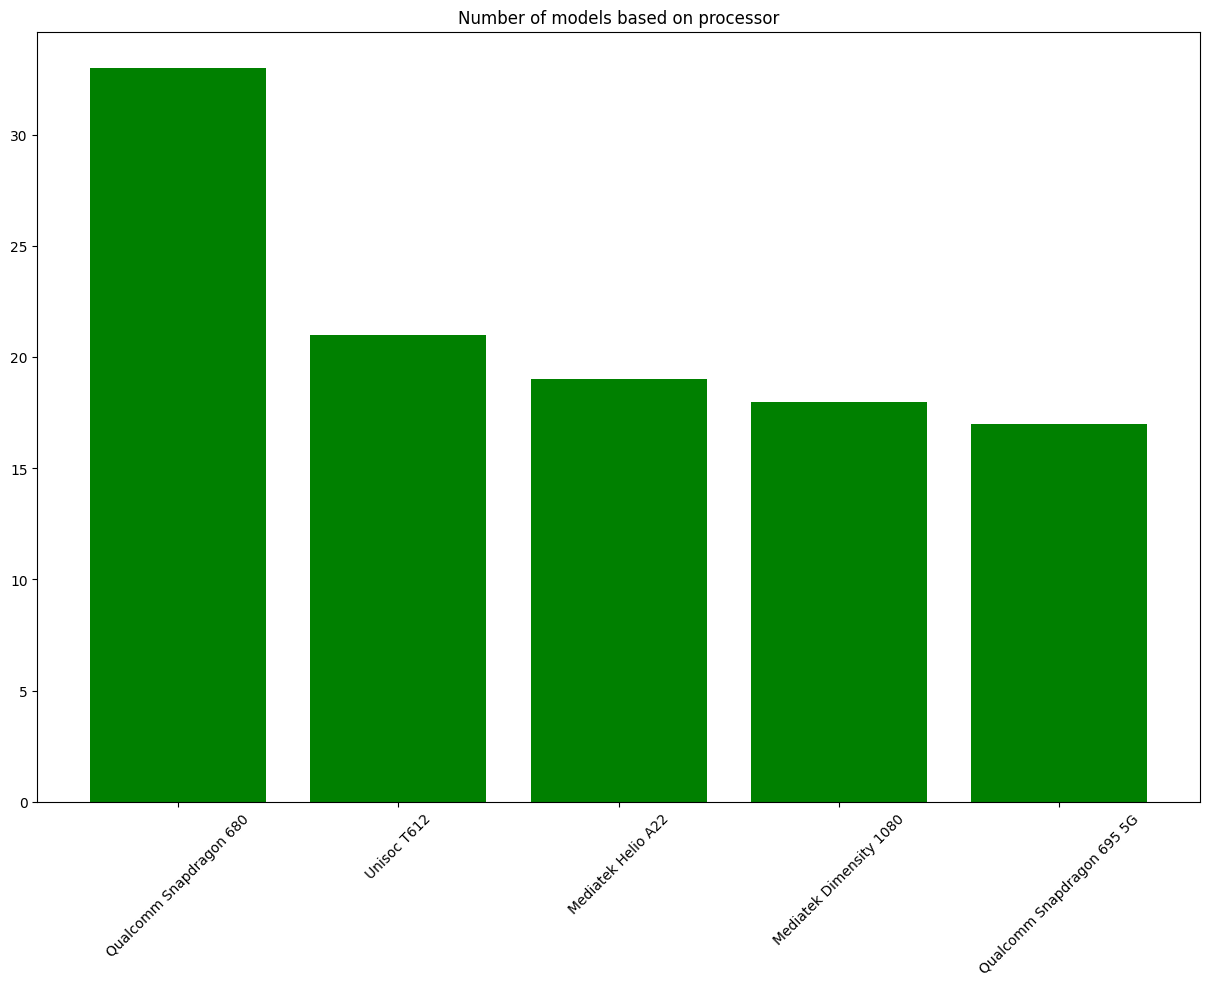

In [21]:
plt.figure(figsize=(15,10))
plt.bar(list(df['Processor_'].value_counts()[0:5].keys()), list(df['Processor_'].value_counts()[0:5]), color="g")
plt.title("Number of models based on processor")
plt.xticks(rotation = 45)
plt.show()


In [39]:
#To get the number of models of a particular brand
df['Model'].value_counts()

Model
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: count, Length: 187, dtype: int64

In [40]:
df['Front Camera'].value_counts()

Front Camera
16MP    164
5MP     135
8MP     129
13MP     49
32MP     22
0MP      16
50MP      7
12MP      6
60MP      4
2MP       3
10MP      2
20MP      2
44MP      2
Name: count, dtype: int64

In [28]:
front_camera = df[df['Front Camera']!=0]

In [30]:
front_camera.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


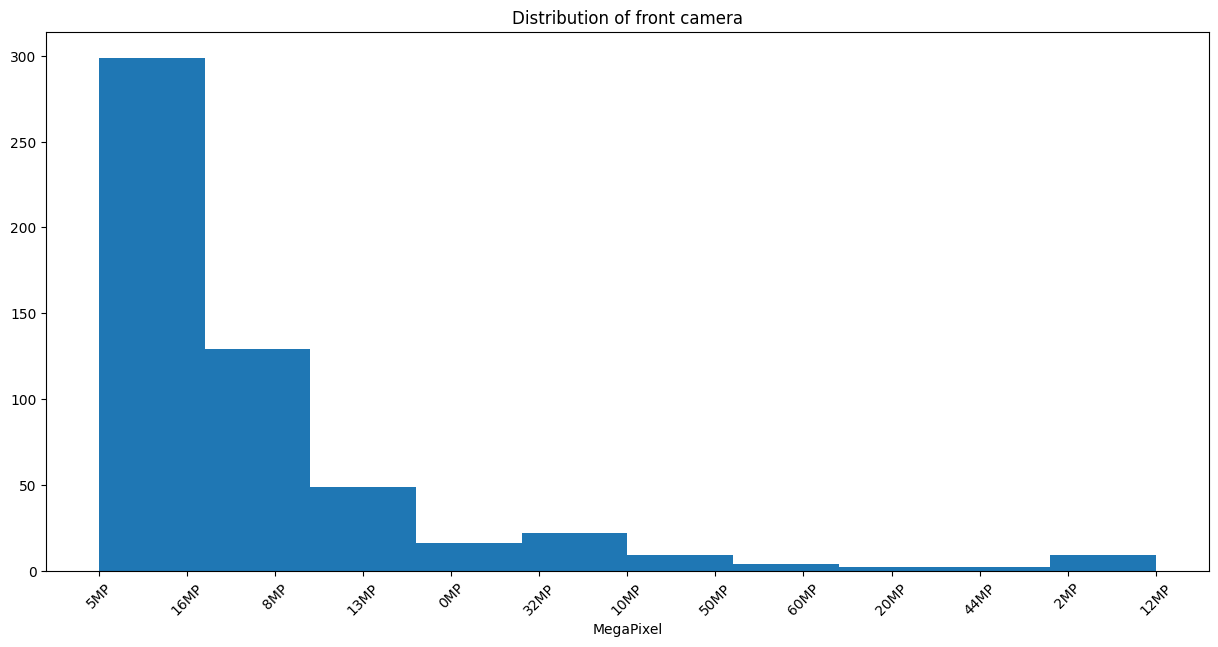

In [27]:
plt.figure(figsize=(15,7))
plt.hist(front_camera['Front Camera'])
plt.title("Distribution of front camera")
plt.xlabel("MegaPixel")
plt.xticks(rotation = 45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

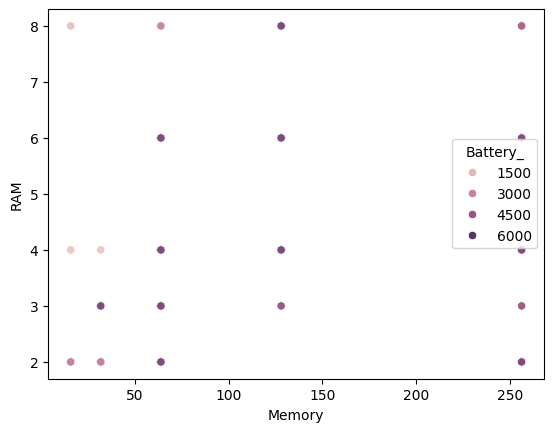

In [9]:
sns.scatterplot(x= 'Memory', y = 'RAM', data =df, hue='Battery_')
plt.show

# **Linear Regression**

In [10]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [17]:
y = df[['Prize']]

In [18]:
x = df[['Memory']]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the data to training and testing sets
x_train,x_test,y_train , y_test = train_test_split(x,y,test_size=0.3)

In [21]:
x_train.head()

,Memory
188,128
281,32
333,64
324,64
336,64


In [23]:
x_test.head()

,Memory
321,128
489,256
418,64
288,64
7,128


In [24]:
y_train.head()

,Prize
188,13999
281,6978
333,14999
324,9499
336,8495


In [22]:
y_test.head()

,Prize
321,12999
489,49999
418,13489
288,13999
7,8999


In [25]:
from sklearn.linear_model import LinearRegression
# Initialize the linear regression
lr = LinearRegression()

In [26]:
# Train the model
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(x_test)

In [28]:
y_test.head()

,Prize
321,12999
489,49999
418,13489
288,13999
7,8999


In [31]:
y_pred[0:5]

array([[18100.98033579],
       [32326.94148007],
       [10987.99976365],
       [10987.99976365],
       [18100.98033579]])

In [75]:
from sklearn.metrics import mean_squared_error
mean_absolute_error_for_model1 = mean_squared_error(y_test,y_pred)
print(f" The mean_absolue_error for the LinearRegression model is {mean_absolute_error_for_model1}")

 The mean_absolue_error for the LinearRegression model is 69346957.50256658


**Model 2**

In [55]:
y = df[['Prize']]

In [56]:
x = df[['AI Lens', 'Mobile Height','Battery_','RAM']]

In [57]:
# Split the data to training and testing sets
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size= 0.3)

In [58]:
# Initialize the linear regression
lr2 = LinearRegression()

In [59]:
# Train the model
lr2.fit(x_train,y_train)


LinearRegression()

In [60]:
y_pred = lr2.predict(x_test)

In [76]:
mean_absolute_error_for_model2 = mean_squared_error(y_test,y_pred)
print(f" The mean_absolue_error for the LinearRegression model is {mean_absolute_error_for_model2} %")

 The mean_absolue_error for the LinearRegression model is 69346957.50256658 %


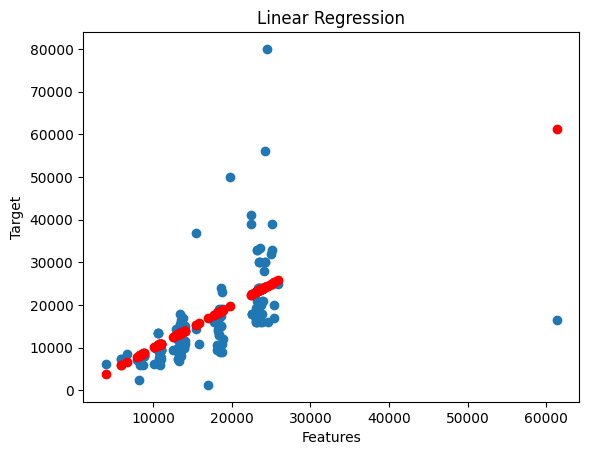

In [84]:
plt.scatter(y_pred,y_test )
plt.scatter(y_pred,y_pred, color = 'red')
plt.xlabel("Features")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.show()
